<a href="https://colab.research.google.com/github/Vivianadiaz41/An-lisis-de-la-Calidad-del-Agua/blob/main/Diazvivianaprimeraentrega.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Proyecto: Análisis de la Calidad del Agua**


 **Introducción**

La calidad del agua es un factor determinante para la salud pública, el desarrollo agrícola y el equilibrio ambiental de cualquier comunidad. En los últimos años, se han reportado diversos problemas de salud en la población local, así como impactos negativos en la producción agrícola debido a la presencia de contaminantes en el agua utilizada para el consumo humano y el riego. A estos problemas se suman condiciones climáticas adversas, como la escasez de lluvias, que han agravado aún más la disponibilidad y el estado del recurso hídrico.

 **Problema**

El deterioro de la calidad del agua en el área de estudio ha generado preocupación tanto en autoridades sanitarias como en sectores productivos. Se han identificado síntomas de contaminación que podrían estar relacionados con la presencia de metales pesados y otros parámetros alterados, como la salinidad, el oxígeno disuelto, el pH y la temperatura. La falta de datos sistemáticos y análisis técnicos ha dificultado la toma de decisiones informadas para mitigar esta problemática.

**Objetivo**

El objetivo principal de este proyecto es analizar la evolución de los parámetros físicos y químicos del agua en los últimos años utilizando un conjunto de datos ambientales recogido en la región. Se busca identificar tendencias, anomalías y relaciones significativas entre las variables que permitan entender el impacto del entorno en la calidad del agua y sus posibles consecuencias sobre la salud y la actividad agrícola.

**Metodología**

Para llevar a cabo este análisis, se utilizará un enfoque cuantitativo basado en técnicas de ciencia de datos con Python. Se emplearán herramientas como pandas, seaborn, matplotlib y scikit-learn para la limpieza de datos, visualización, selección de características y modelado predictivo. Entre las variables analizadas se encuentran: oxígeno disuelto, salinidad, pH, temperatura del agua y del aire, y profundidad. Además, se aplicarán modelos de regresión y análisis de correlación para explorar cómo han cambiado estos parámetros en el tiempo y si están asociados con indicadores de contaminación o estrés ambiental.

**Principales hallazgos esperados**
Se espera identificar si la calidad del agua ha empeorado en los últimos años y cuáles son los factores más influyentes. En particular, se buscará verificar si hay un aumento en la temperatura del agua (posiblemente vinculado al cambio climático), una reducción del oxígeno disuelto (indicador clave de vida acuática) y evidencia de concentraciones elevadas de metales pesados o salinidad que puedan afectar cultivos y salud. Estos hallazgos servirán como base para futuras intervenciones y monitoreos ambientales más precisos.

* Fuente de datos:
https://www.kaggle.com/datasets/sahirmaharajj/water-quality-data




In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [ ]:
df = pd.read_csv("/content/WaterQualityData_2024.csv")


# A continuación se describe las  columnas  que  presenta  el dataset

**Identificación y fecha**
Site_Id: Identificador del sitio de muestreo. Permite distinguir entre diferentes ubicaciones donde se midieron los datos.

**Read_Date:** Fecha en la que se realizaron las mediciones.

**Year: **Año en formato numérico, extraído de la fecha.

**Parámetros de calidad del agua**
Salinity (ppt): Concentración de sales disueltas en partes por mil (salinidad). Importante para distinguir entre agua dulce, salobre y salada.

**Dissolved Oxygen (mg/L):** Oxígeno disuelto en miligramos por litro. Parámetro clave para evaluar la salud del ecosistema acuático.

**pH (standard units):** Acidez o alcalinidad del agua. Valores extremos pueden ser perjudiciales para la vida acuática.

**Secchi Depth (m):** Profundidad de disco Secchi. Indica la transparencia del agua (mayor profundidad = agua más clara).

**Water Depth (m):** Profundidad del cuerpo de agua en el momento de la medición.

**Water Temp (?C)**: Temperatura del agua en grados Celsius.

 Condiciones atmosféricas
Air Temp-Celsius: Temperatura del aire en grados Celsius.

Air Temp (?F): Temperatura del aire en grados Fahrenheit.

AirTemp (C): Parece duplicar el campo anterior. Podría ser un dato redundante o derivado.

 **Información operativa**
Time (24:00): Hora de la medición en formato 24 horas.

**Field_Tech**: Nombre o identificador del técnico de campo que tomó la muestra.

**DateVerified**: Fecha en la que los datos fueron verificados o validados.



In [ ]:
print(df.columns)


Index(['Site_Id', 'Unit_Id', 'Read_Date', 'Salinity (ppt)',
       'Dissolved Oxygen (mg/L)', 'pH (standard units)', 'Secchi Depth (m)',
       'Water Depth (m)', 'Water Temp (?C)', 'Air Temp-Celsius',
       'Air Temp (?F)', 'Time (24:00)', 'Field_Tech', 'DateVerified',
       'WhoVerified', 'AirTemp (C)', 'Year'],
      dtype='object')


# 2. Analizar datos perdidos

In [ ]:
print("Datos faltantes por columna:")
print(df.isnull().sum())


Datos faltantes por columna:
Site_Id                       1
Unit_Id                    2339
Read_Date                     5
Salinity (ppt)              130
Dissolved Oxygen (mg/L)     851
pH (standard units)          95
Secchi Depth (m)             73
Water Depth (m)              71
Water Temp (?C)             121
Air Temp-Celsius           2286
Air Temp (?F)                71
Time (24:00)                 63
Field_Tech                   39
DateVerified               1918
WhoVerified                1918
AirTemp (C)                   0
Year                          0
dtype: int64


# 3. Eliminar filas con valores faltantes en columnas clave

In [ ]:
df_clean = df.dropna(subset=['Water Temp (?C)', 'Dissolved Oxygen (mg/L)', 'Year'])


# 4. Agrupar por año y calcular promedios anuales


In [ ]:
annual_means = df_clean.groupby('Year')[['Water Temp (?C)', 'Dissolved Oxygen (mg/L)']].mean().reset_index()


# 5. Calcular cambio de temperatura


In [ ]:
temp_change = annual_means['Water Temp (?C)'].iloc[-1] - annual_means['Water Temp (?C)'].iloc[0]
print(f"\n Cambio de temperatura en los últimos años: {temp_change:.2f} °C")



 Cambio de temperatura en los últimos años: -1.76 °C


# 6. Correlación entre temperatura y oxígeno disuelto


In [ ]:
from scipy.stats import pearsonr


In [ ]:
corr, p_value = pearsonr(df_clean['Water Temp (?C)'], df_clean['Dissolved Oxygen (mg/L)'])
print(f"Correlación entre temperatura y oxigeno disuelto: r = {corr:.2f}, p = {p_value:.4f}")


Correlación entre temperatura y oxigeno disuelto: r = -0.51, p = 0.0000


# 7. Visualización de tendencias


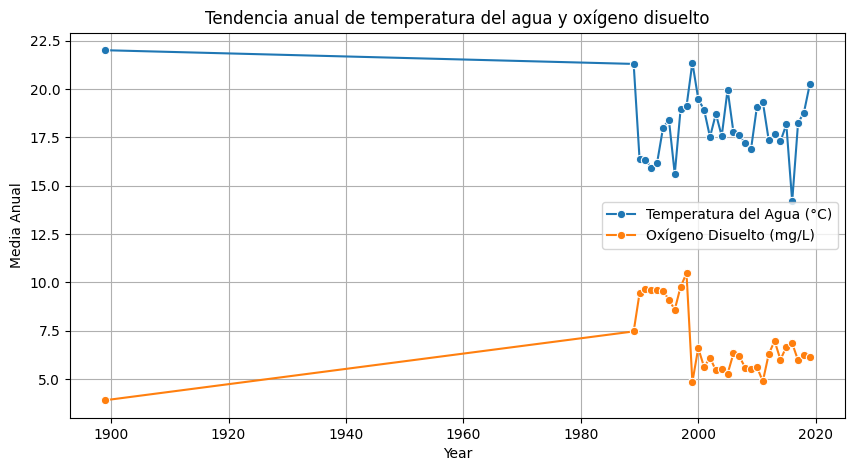

In [ ]:
plt.figure(figsize=(10,5))
sns.lineplot(data=annual_means, x='Year', y='Water Temp (?C)', label='Temperatura del Agua (°C)', marker='o')
sns.lineplot(data=annual_means, x='Year', y='Dissolved Oxygen (mg/L)', label='Oxígeno Disuelto (mg/L)', marker='o')
plt.title('Tendencia anual de temperatura del agua y oxígeno disuelto')
plt.ylabel('Media Anual')
plt.grid(True)
plt.legend()
plt.show()

# Exploración de Datos

In [ ]:
 df = pd.read_csv("/content/WaterQualityData_2024.csv")
len(df)

2371

In [ ]:
 df = pd.read_csv("/content/WaterQualityData_2024.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2371 entries, 0 to 2370
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Site_Id                  2370 non-null   object 
 1   Unit_Id                  32 non-null     object 
 2   Read_Date                2366 non-null   object 
 3   Salinity (ppt)           2241 non-null   float64
 4   Dissolved Oxygen (mg/L)  1520 non-null   float64
 5   pH (standard units)      2276 non-null   float64
 6   Secchi Depth (m)         2298 non-null   float64
 7   Water Depth (m)          2300 non-null   float64
 8   Water Temp (?C)          2250 non-null   float64
 9   Air Temp-Celsius         85 non-null     float64
 10  Air Temp (?F)            2300 non-null   float64
 11  Time (24:00)             2308 non-null   object 
 12  Field_Tech               2332 non-null   object 
 13  DateVerified             453 non-null    object 
 14  WhoVerified             

In [ ]:
df.describe().round(1)


,Salinity (ppt),Dissolved Oxygen (mg/L),pH (standard units),Secchi Depth (m),Water Depth (m),Water Temp (?C),Air Temp-Celsius,Air Temp (?F),AirTemp (C),Year
count,2241.0,1520.0,2276.0,2298.0,2300.0,2250.0,85.0,2300.0,2371.0,2371.0
mean,0.7,6.6,7.2,0.5,0.8,18.1,16.4,62.1,15.7,2006.0
std,1.2,2.5,0.8,0.5,0.6,8.3,11.8,15.5,10.3,9.0
min,0.0,0.0,0.3,0.0,0.0,0.0,0.0,10.5,-17.8,1899.0
25%,0.0,4.8,6.5,0.3,0.4,11.0,9.0,49.0,8.9,2001.0
50%,0.0,6.5,7.0,0.4,0.6,19.0,15.0,63.0,16.7,2007.0
75%,1.0,8.5,7.5,0.6,1.0,25.0,21.7,75.0,23.9,2012.0
max,9.0,15.1,9.9,9.0,12.0,74.0,74.0,92.3,33.5,2019.0


In [ ]:
df['Salinity (ppt)'].unique()

array([1.3 , 1.5 , 1.  , 0.5 , 1.2 , 2.  , 2.3 , 2.5 , 2.25, 2.8 , 3.  ,
        nan, 3.4 , 3.2 , 4.2 , 2.9 , 1.8 , 4.1 , 4.5 , 3.7 , 2.1 , 3.5 ,
       3.8 , 3.9 , 2.4 , 0.7 , 0.4 , 0.9 , 0.  , 2.6 , 9.  , 4.7 , 6.2 ,
       3.3 , 1.4 , 2.2 , 1.6 , 5.  , 4.3 , 5.1 , 4.8 , 5.4 , 1.7 , 4.  ,
       5.5 , 4.4 , 3.1 , 1.9 , 1.1 , 0.1 , 0.2 , 0.3 , 0.08, 0.8 , 0.05,
       0.01, 8.  , 0.09, 0.6 , 0.66, 0.18, 0.24])

In [ ]:
df['Dissolved Oxygen (mg/L)'].unique()

array([11.7 , 12.  , 10.5 , 10.1 , 12.6 ,  9.9 , 10.4 ,  9.2 ,  8.6 ,
        8.8 , 10.  ,  9.8 ,  8.2 , 10.8 ,  8.7 ,  9.4 ,  7.3 , 10.7 ,
       11.  , 10.2 ,  6.9 ,  9.1 ,  7.9 ,  8.4 ,  7.4 ,  9.  , 11.4 ,
         nan,  1.6 ,  6.2 ,  5.8 ,  3.2 ,  7.1 ,  6.  ,  7.8 , 10.3 ,
       11.9 ,  9.7 , 10.6 , 11.6 , 13.8 ,  9.6 ,  8.9 ,  7.7 ,  7.5 ,
        8.1 , 12.5 , 11.05, 11.8 , 12.2 , 13.2 , 11.1 , 12.9 ,  9.95,
        9.75,  8.3 ,  8.  ,  9.5 ,  6.8 ,  8.5 , 11.3 , 15.1 , 14.2 ,
        0.8 ,  7.6 , 10.9 , 12.4 , 12.7 , 12.8 , 11.2 ,  7.2 ,  9.3 ,
       13.  , 12.1 , 10.75,  7.  ,  8.69,  9.71,  8.15, 11.5 ,  6.4 ,
        4.65,  2.  ,  1.7 ,  6.5 , 11.43, 12.25, 13.3 , 10.55,  9.45,
        9.73,  8.55, 10.25, 14.3 , 12.3 ,  2.6 ,  1.35,  5.65,  6.7 ,
        4.7 ,  3.1 ,  2.2 ,  3.6 ,  6.3 ,  3.25,  6.1 ,  1.9 ,  2.4 ,
        3.7 ,  5.5 ,  4.3 ,  2.5 ,  2.8 ,  1.5 ,  3.4 ,  6.45,  8.25,
        1.8 ,  3.  ,  4.8 ,  5.  ,  5.2 ,  3.5 ,  5.9 ,  5.7 ,  4.4 ,
        4.1 ,  5.3 ,

In [ ]:
df['pH (standard units)'].unique()

array([7.3 , 7.4 , 7.2 , 7.1 , 7.6 , 7.9 , 7.5 , 7.8 , 9.1 , 8.5 , 8.6 ,
       9.  , 8.1 , 9.4 , 9.2 , 8.8 , 9.3 , 8.4 , 7.7 , 6.9 , 8.  , 9.5 ,
       7.  , 7.75, 7.85,  nan, 8.3 , 6.8 , 8.2 , 8.7 , 6.7 , 6.6 , 6.5 ,
       6.3 , 6.4 , 8.9 , 5.7 , 9.7 , 5.6 , 9.9 , 0.3 , 9.8 , 9.6 , 6.  ,
       5.5 , 0.7 , 5.  , 6.25, 4.8 ])

In [ ]:
df['Secchi Depth (m)'].unique()

array([0.4  , 0.2  , 0.25 , 0.35 , 0.15 , 0.05 , 0.5  , 0.45 , 0.3  ,
       0.22 , 0.88 , 0.32 , 0.375, 0.1  , 0.275, 0.325, 0.99 , 0.38 ,
         nan, 0.31 , 0.28 , 0.33 , 0.55 , 0.75 , 0.43 , 0.48 , 2.5  ,
       0.39 , 0.21 , 0.6  , 0.65 , 5.8  , 0.8  , 0.7  , 0.63 , 1.75 ,
       0.95 , 1.05 , 1.15 , 1.1  , 0.9  , 0.42 , 5.5  , 0.85 , 0.37 ,
       4.   , 0.   , 0.23 , 1.4  , 1.45 , 1.2  , 0.26 , 0.16 , 0.01 ,
       1.   , 0.36 , 1.5  , 1.3  , 1.25 , 1.6  , 0.07 , 2.   , 1.9  ,
       7.4  , 0.53 , 0.58 , 0.67 , 0.03 , 3.5  , 0.82 , 4.5  , 0.17 ,
       2.2  , 0.12 , 3.   , 1.7  , 1.8  , 9.   ])

In [ ]:
df['Water Depth (m)'].unique()

array([4.000e-01, 3.500e-01, 6.000e-01, 5.000e-01, 9.000e-01, 7.500e-01,
       9.500e-01, 7.000e-01, 6.500e-01, 8.000e-01, 5.000e-02, 1.200e+00,
       5.500e-01, 8.500e-01, 3.000e-01, 1.000e+00, 3.900e-01, 1.500e+00,
       6.900e-01, 9.200e-01, 7.800e-01, 7.200e-01, 5.900e-01, 1.300e+00,
       9.900e-01, 1.220e+00, 6.200e-01, 9.100e-01, 8.200e-01, 1.250e+00,
       4.800e-01, 9.800e-01, 9.400e-01, 6.800e-01, 9.300e-01, 3.800e-01,
       4.100e-01, 2.800e-01, 1.600e+00, 8.300e-01, 5.200e-01, 1.090e+00,
       3.750e-01, 9.250e-01, 1.025e+00, 1.010e+00, 8.800e-01,       nan,
       3.700e-01, 2.500e-01, 4.900e-01, 4.500e-01, 5.800e-01, 4.200e-01,
       1.050e+00, 1.500e-01, 6.300e-01, 1.150e+00, 1.700e+00, 3.100e+00,
       2.000e-01, 7.300e-01, 1.020e+00, 6.100e-01, 3.500e+00, 5.400e-01,
       7.400e-01, 6.700e-01, 7.100e-01, 6.600e-01, 2.100e-01, 5.800e+00,
       1.850e+00, 1.650e+00, 1.550e+00, 1.350e+00, 1.400e+00, 5.500e+00,
       1.100e+00, 4.500e+00, 1.000e-01, 2.300e-01, 

In [ ]:
df['Water Temp (?C)'].unique()

array([ 5.9 ,  3.  , 10.  ,  1.6 ,  9.7 ,  9.8 , 16.1 , 15.  , 15.7 ,
       17.5 , 19.3 , 18.8 , 22.1 , 21.7 , 22.3 , 23.8 , 27.9 , 29.5 ,
       25.5 , 28.5 , 30.5 , 29.  , 22.  , 24.5 , 27.  , 17.  , 21.  ,
       20.5 , 23.  , 18.  , 13.  ,  5.  ,  8.  , 30.  , 25.  , 21.5 ,
       28.  , 26.  ,  8.5 ,  9.  ,  7.  ,  2.5 ,  9.5 , 11.  , 20.  ,
       19.  , 24.  , 23.5 , 26.5 ,  4.5 ,  7.5 , 12.  ,  6.  , 14.  ,
       12.5 , 15.5 , 27.5 , 22.5 ,  2.  , 16.  ,   nan, 19.5 , 16.5 ,
       18.5 , 10.5 ,  5.5 , 14.5 , 15.6 , 17.3 , 12.1 ,  1.3 ,  3.8 ,
       13.5 , 11.5 , 32.  ,  4.  ,  3.5 , 10.1 ,  6.2 ,  9.1 ,  5.21,
        0.  ,  8.2 , 14.1 , 13.2 , 17.1 ,  8.4 , 21.6 ,  8.9 ,  8.1 ,
       22.9 , 31.  , 34.  , 43.  , 34.5 , 42.5 , 35.  ,  9.9 , 10.3 ,
       48.  ,  6.5 , 59.  , 25.1 , 60.  , 25.2 ,  0.7 ,  7.2 , 74.  ,
       54.  ,  1.  ,  0.9 , 33.  , 26.1 , 21.4 , 22.8 ])

In [ ]:
df['Air Temp-Celsius'].unique()

array([ 8. ,  2.6,  7.6,  2.7,  0. , 15.2, 10.1, 22.1, 13.5, 13. , 16.6,
       19.5, 22.3, 24.3, 22.7, 25.7, 26.9, 30.5, 27.9, 28. , 28.5, 25.5,
       21.5, 20. , 24.5, 27. , 17. , 19. , 23. , 15. , 17.5,  5. ,  9.5,
        nan, 22. , 74. , 18. , 16. ,  9. ,  3. ,  7. , 14. , 10. , 11. ,
       21.7, 37. ])

Tendencias de calidad del agua a lo largo del tiempo
¿Cómo ha cambiado la calidad del agua entre los años registrados?

¿Los niveles de oxígeno disuelto han aumentado o disminuido?

Hipótesis: gracias a políticas ambientales o cambios climáticos, ciertos parámetros han mejorado o empeorado.

# Objetivo del análisis:
Detectar si ha mejorado o empeorado la calidad del agua en los últimos años.

 Parámetros relevantes:
Dissolved Oxygen (mg/L) → oxígeno disuelto

pH (standard units) → acidez

Salinity (ppt) → salinidad

Secchi Depth (m) → transparencia del agua

Water Temp (°C) → temperatura del agua (influye en el oxígeno)



In [ ]:
grouped_df = df.groupby('Year').agg({
    'Dissolved Oxygen (mg/L)': 'mean',
    'pH (standard units)': 'mean',
    'Salinity (ppt)': 'mean',
    'Secchi Depth (m)': 'mean',
    'Water Temp (?C)': 'mean'
})


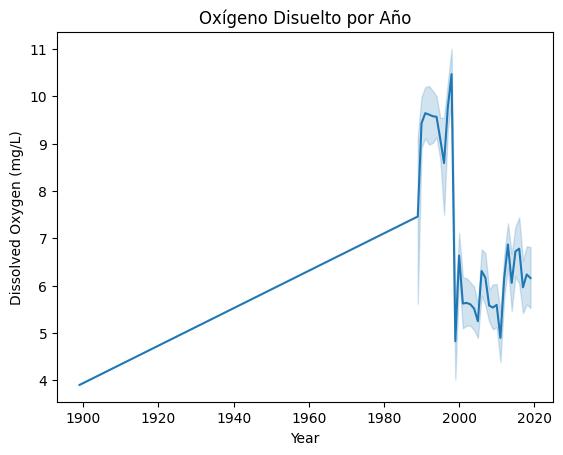

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

 figura
fig, ax = plt.subplots()
sns.lineplot(data=df, x='Year', y='Dissolved Oxygen (mg/L)', ax=ax)
ax.set_title('Oxígeno Disuelto por Año')

# Mostrar
plt.show()


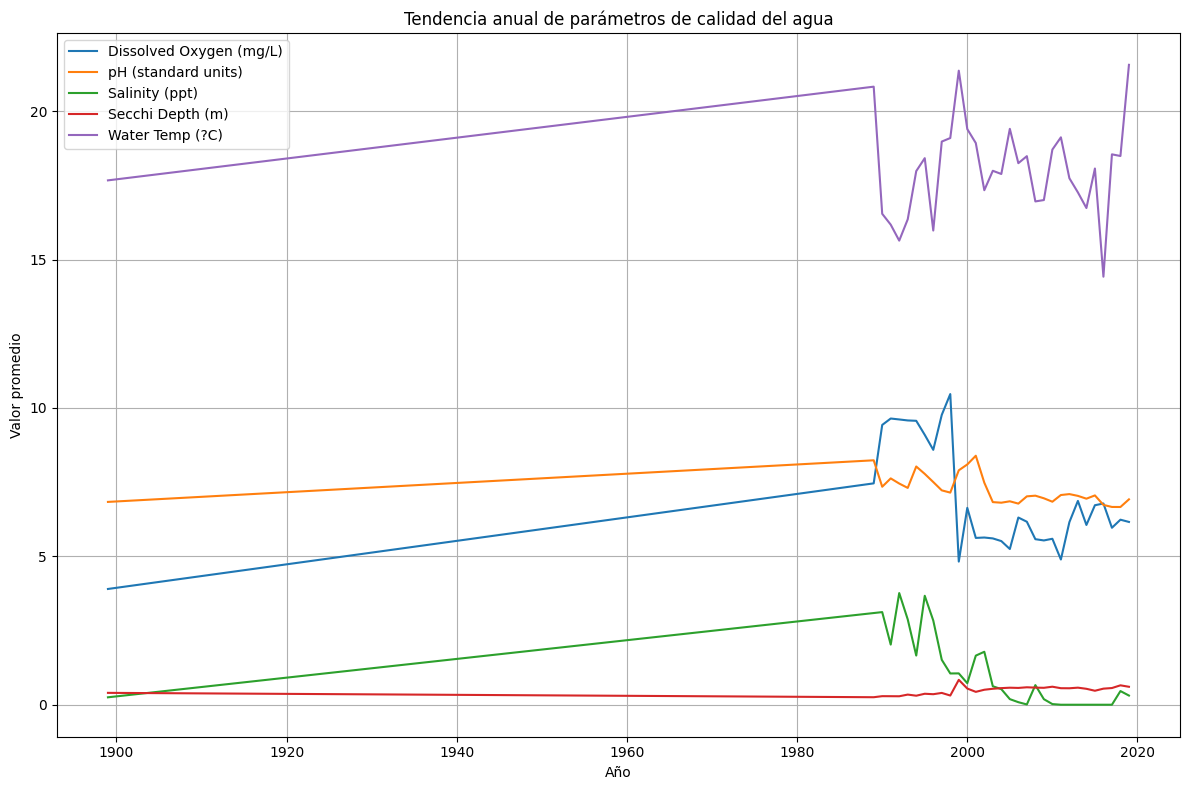

In [ ]:

df['Year'] = pd.to_numeric(df['Year'], errors='coerce')


params = ['Dissolved Oxygen (mg/L)', 'pH (standard units)',
          'Salinity (ppt)', 'Secchi Depth (m)', 'Water Temp (?C)']
trend_data = df.groupby('Year')[params].mean().reset_index()

plt.figure(figsize=(12, 8))
for param in params:
    sns.lineplot(data=trend_data, x='Year', y=param, label=param)

plt.title("Tendencia anual de parámetros de calidad del agua")
plt.xlabel("Año")
plt.ylabel("Valor promedio")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

/tmp/ipython-input-22-1517534331.py:23: UserWarning: Glyph 127777 (\N{THERMOMETER}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127777 (\N{THERMOMETER}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


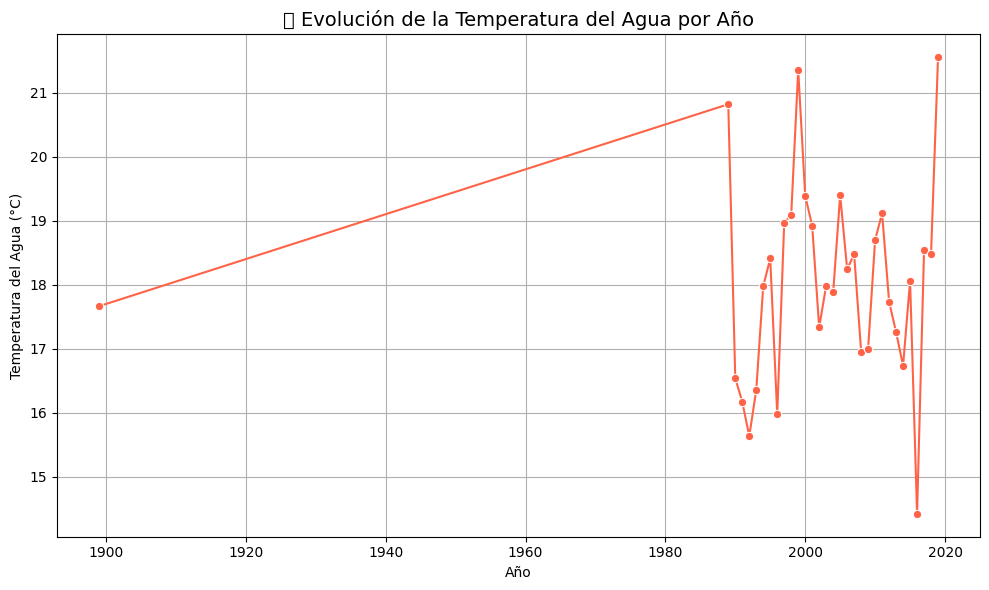

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Convertir el año a numérico por si viene como texto
df['Year'] = pd.to_numeric(df['Year'], errors='coerce')

# Eliminar filas con temperatura nula
df_temp = df.dropna(subset=['Water Temp (?C)'])

# Agrupar por año y calcular temperatura promedio
temp_anual = df_temp.groupby('Year')['Water Temp (?C)'].mean().reset_index()

# Crear gráfico de línea
plt.figure(figsize=(10, 6))
sns.lineplot(data=temp_anual, x='Year', y='Water Temp (?C)', marker='o', color='tomato')

# Estética del gráfico
plt.title('🌡️ Evolución de la Temperatura del Agua por Año', fontsize=14)
plt.xlabel('Año')
plt.ylabel('Temperatura del Agua (°C)')
plt.grid(True)
plt.tight_layout()
plt.show()





# Aumento sostenido Indicio de  calentamiento en los  ultimos 20 años

/tmp/ipython-input-23-451543822.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Coeficiente', y='Variable', data=coefficients, palette='viridis')


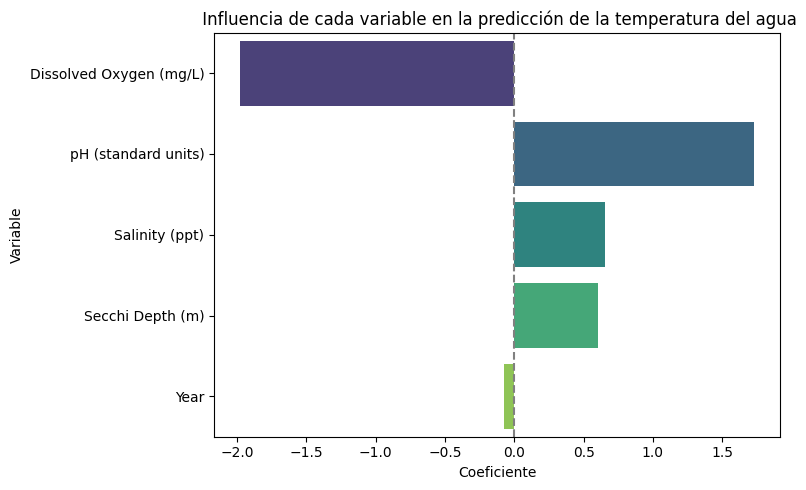

In [ ]:
from sklearn.linear_model import LinearRegression
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Define the list of feature names used to train the model
features = ['Dissolved Oxygen (mg/L)', 'pH (standard units)',
            'Salinity (ppt)', 'Secchi Depth (m)', 'Year']

# Prepare data for the model
# Drop rows where any of the features or the target variable ('Water Temp (?C)') is NaN
df_model = df[features + ['Water Temp (?C)']].dropna()

X = df_model[features] # Features DataFrame
y = df_model['Water Temp (?C)'] # Target variable

# Ensure the model variable is defined and the model is fitted before this cell
model = LinearRegression()
model.fit(X, y)


# Obtener coeficientes
coefficients = pd.DataFrame({
    'Variable': features,
    'Coeficiente': model.coef_
})

# Gráfico de barras
plt.figure(figsize=(8, 5))
sns.barplot(x='Coeficiente', y='Variable', data=coefficients, palette='viridis')
plt.axvline(0, color='gray', linestyle='--')
plt.title(" Influencia de cada variable en la predicción de la temperatura del agua")
plt.tight_layout()
plt.show()

# El pH del agua tiene la mayor influencia positiva sobre la temperatura del agua. A mayor valor del PH mayor es la  temperatura  del agua  
Factores  que  puedén influir


*   Factores biologícos  o procesos químicos que  ocurren en ambientes más alcalinos
# La salinidad muestra una influencia negativa
Se presenta  mayor  salinidad. Por  ello la temperatura del agua tienda  a  ser más baja.

Este  patrón  puede  estar  asociado
*   A cuerpos  de  agua que reciben aporte de agua salada (más fría)
*   Efecto evaporativas en zonas  más saladas

*   Cambio de  estación

  # El año tiene un impacto positivo pero muy bajo

 El coeficiente positivo, aunque pequeño, indica una tendencia creciente de la temperatura del agua con el tiempo. Esto puede ser un indicador débil pero persistente del efecto del cambio climático o del calentamiento global sobre los cuerpos de agua monitoreados.








# Conclusión
El hecho de que el pH tenga tanta influencia puede ser una señal para investigar si hay fuentes de contaminación o vertidos alcalinos que estén alterando simultáneamente la calidad y la temperatura del agua.

La correlación negativa entre salinidad y temperatura puede ayudar a comprender qué zonas están más vulnerables al cambio de composición del agua, y cómo esto podría afectar la salud ambiental o agrícola.

La tendencia temporal, aunque leve, debería seguir monitoreándose para ver si se incrementa en los próximos años.

Métricas del modelo Random Forest (con más variables):
R² (Coef. de determinación): 0.849
MAE (Error absoluto medio): 2.096
RMSE (Raíz del error cuadrático medio): 2.575


/tmp/ipython-input-26-3037207041.py:53: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importancia', y='Variable', data=feature_importance_df, palette='coolwarm')


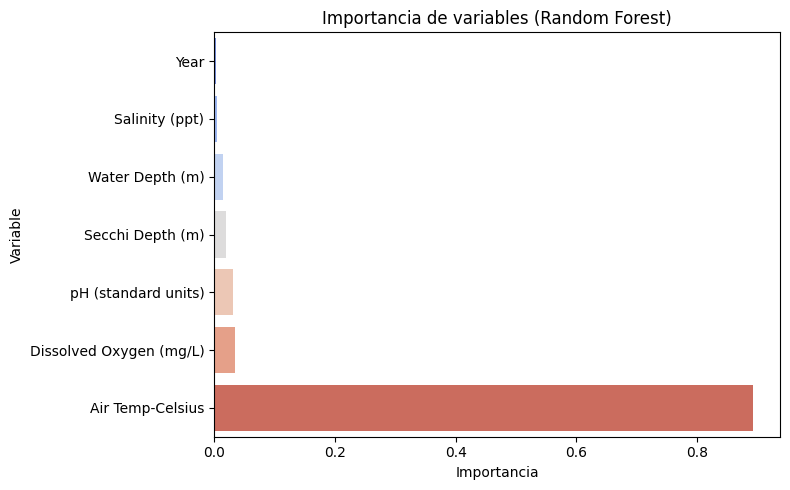

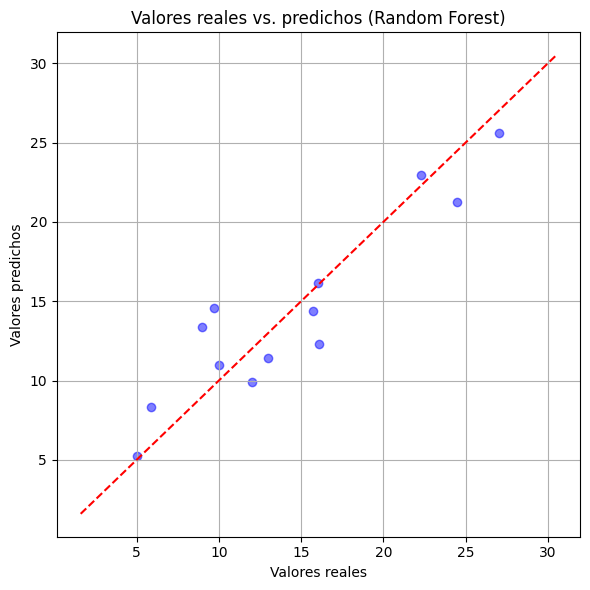

In [ ]:
# Importación de librerías
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Cargar datos (asegúrate de tener tu DataFrame en df)
# df = pd.read_csv('ruta/a/tu/archivo.csv')  # Ya lo tenés cargado como df

# 2. Seleccionar variables
features = ['Year', 'pH (standard units)', 'Salinity (ppt)',
            'Dissolved Oxygen (mg/L)', 'Secchi Depth (m)',
            'Water Depth (m)', 'Air Temp-Celsius']

target = 'Water Temp (?C)'

# 3. Eliminar filas con datos faltantes en las columnas seleccionadas
df_model = df.dropna(subset=features + [target])

X = df_model[features]
y = df_model[target]

# 4. División en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 5. Crear y entrenar modelo
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# 6. Predicciones
y_pred = model.predict(X_test)

# 7. Evaluación del modelo
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"Métricas del modelo Random Forest (con más variables):")
print(f"R² (Coef. de determinación): {r2:.3f}")
print(f"MAE (Error absoluto medio): {mae:.3f}")
print(f"RMSE (Raíz del error cuadrático medio): {rmse:.3f}")

# 8. Importancia de variables
importances = model.feature_importances_
feature_importance_df = pd.DataFrame({'Variable': features, 'Importancia': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importancia', ascending=True)

# Gráfico de importancia
plt.figure(figsize=(8, 5))
sns.barplot(x='Importancia', y='Variable', data=feature_importance_df, palette='coolwarm')
plt.title("Importancia de variables (Random Forest)")
plt.xlabel("Importancia")
plt.ylabel("Variable")
plt.tight_layout()
plt.show()

# 9. Gráfico de valores reales vs predichos
plt.figure(figsize=(6, 6))
plt.scatter(y_test, y_pred, alpha=0.5, color='blue')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
plt.title("Valores reales vs. predichos (Random Forest)")
plt.xlabel("Valores reales")
plt.ylabel("Valores predichos")
plt.grid(True)
plt.tight_layout()
plt.show()


# Grafíco Random Forest


 El eje vertical muestra las variables utilizadas en el modelo, y el eje horizontal indica su importancia relativa (cuánto aporta cada una a las predicciones del modelo).

Principales observaciones:

Air Temp-Celsius (Temperatura del aire) es, por mucho, la variable más importante.
‣ Su importancia supera el 90% del total, lo que indica que es el principal factor asociado a la temperatura del agua.
‣ Esto es lógico, ya que la temperatura del aire influye directamente en la del agua, especialmente en cuerpos de agua superficiales.

 Dissolved Oxygen (mg/L), pH (standard units) y Secchi Depth (transparencia del agua) tienen un aporte muy bajo, pero aún así muestran alguna relación con la temperatura del agua.
‣ Estos factores están vinculados con procesos físico-químicos del agua que pueden estar influenciados por su temperatura (por ejemplo, el oxígeno se disuelve menos a mayor temperatura).

 Salinity, Water Depth y Year tienen importancia marginal.
‣ La profundidad o el año por sí solos no aportan información relevante para predecir la temperatura, al menos según este modelo.

Conclusión:

Se observa  que la temperatura del aire es, con diferencia, el factor más determinante en la predicción de la temperatura del agua en este conjunto de datos. Esto refuerza la idea de que un aumento sostenido de las temperaturas ambientales (por ejemplo, por cambio climático) podría impactar directamente en los ecosistemas acuáticos.


# Propuestas de mejora basadas en los datos analizados

A partir del análisis estadístico y del modelo predictivo aplicado, se identificaron variables clave que influyen significativamente en la temperatura del agua, un parámetro fundamental para evaluar la calidad del recurso hídrico. En función de estos hallazgos, se proponen las siguientes recomendaciones de mejora para las autoridades competentes:

1. Monitoreo sistemático de temperatura del aire y del agua

Dado que la temperatura del aire fue la variable más influyente, se recomienda instalar estaciones meteorológicas o sensores automáticos para medir temperatura ambiental y del agua en tiempo real. Esto permitirá detectar anomalías rápidamente.

2.Control y seguimiento del pH y salinidad

Se detectó que el pH tiene una relación importante con la temperatura del agua, y la salinidad también tiene peso moderado. Se sugiere implementar controles regulares del pH y la salinidad, sobre todo en épocas de altas temperaturas o sequías, para prevenir deterioros de la calidad del agua.

3.Plan de remediación o tratamiento del agua

En zonas donde los valores de pH o salinidad estén fuera del rango aceptable para el consumo o riego, implementar tecnologías de corrección (oxigenación, neutralización, desalinización u otras) podría mitigar los impactos sobre la salud pública y los cultivos.

4.Protección de áreas vegetadas ribereñas

La vegetación en las cercanías de los cuerpos de agua actúa como regulador térmico y contribuye a mantener la calidad del agua. Se recomienda proteger o reforestar las zonas de ribera o cuencas para evitar el aumento sostenido de temperatura y pérdida de oxígeno disuelto.

5. Fortalecimiento de los sistemas de información hídrica

La falta de datos fue una limitante inicial. Se propone generar una base de datos centralizada con indicadores de calidad del agua que incluya monitoreos frecuentes y variables fisicoquímicas clave, integrando datos de distintas instituciones y organismos.

6.Implementación de modelos predictivos en la gestión pública

Incorporar modelos como Random Forest en los sistemas de alerta temprana puede ayudar a anticipar situaciones de riesgo hídrico o contaminación, permitiendo una respuesta más eficiente por parte de los organismos responsables.